In [1]:
#slopes plot extracted from txt files
import numpy as np
import yt
import time
from yt.funcs import mylog
import matplotlib.pyplot as plt
mylog.setLevel(40) #prevents warning
plt.style.use('default')
import scipy
from scipy import optimize
import pandas as pd
plt.rcParams["font.family"] = "serif"

In [2]:
#importing timing and other files
inputfile = ('slope_0%.txt','slope_1%.txt','slope_2%.txt','slope_3%.txt','slope_4%.txt','slope_5%.txt')#,'slope_10%_and_6%.txt',)
time_file = pd.read_csv("Time_conversions.csv")
times = time_file['time']
times = times*3.71e-14   #convert seconds to Myear
time_gtmp =times[0:6]
time_gtmp = time_gtmp-time_gtmp[0]
time_gtm = times[7:13]
time_gtm = time_gtm-time_gtm[7]
time_gt = times[14:20]
time_gt = time_gt-time_gt[14]
time_g = times[21:27]
time_g = time_g-time_g[21]

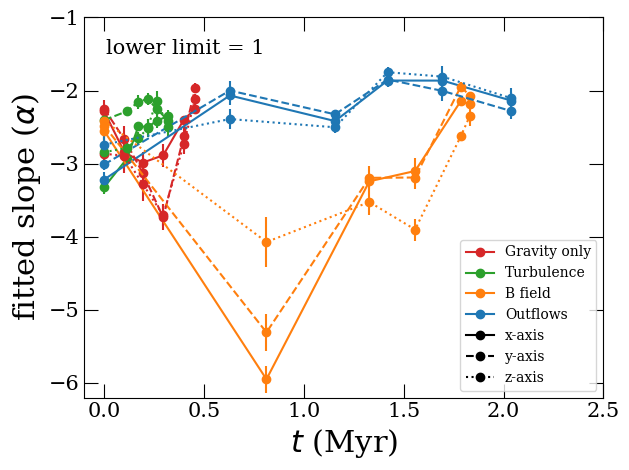

In [19]:
#main plotting cell
line = ('solid', 'dashed', 'dotted')
#inputfile = ('txt_file_storage/slope_0%_lim,5.txt','txt_file_storage/slope_1%_lim,5.txt','txt_file_storage/slope_2%_lim,5.txt','txt_file_storage/slope_3%_lim,5.txt','txt_file_storage/slope_4%_lim,5.txt','txt_file_storage/slope_5%_lim,5.txt')#,'slope_10%_and_6%.txt',)
inputfile = ('txt_file_storage/slope_0%_lim1.txt','txt_file_storage/slope_1%_lim1.txt','txt_file_storage/slope_2%_lim1.txt','txt_file_storage/slope_3%_lim1.txt','txt_file_storage/slope_4%_lim1.txt','txt_file_storage/slope_5%_lim1.txt')
plt.tick_params(direction='in', length=6)

plt.annotate('lower limit = 1',[.01,-1.5], size =15)

for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    error_x_g = []
    error_x_gt = []
    error_x_gtm = []
    error_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])
        #error bar cutting
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[1]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        error_x_g.append(slope_list[0+a])
        error_x_gt.append(slope_list[3+a])
        error_x_gtm.append(slope_list[6+a])
        error_x_gtmp.append(slope_list[9+a])
        
    plt.errorbar(time_g,slope_x_g,yerr = error_x_g, marker = "o", color = 'C3', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gt,slope_x_gt,yerr = error_x_gt, marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gtm,slope_x_gtm,yerr = error_x_gtm, marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gtmp,slope_x_gtmp,yerr = error_x_gtmp, marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    #Invisible lines to fix legend
    plt.plot(0,0, marker = "o", color = 'C3', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'C2', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'C1', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'C0', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'black', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'black', linestyle = line[1])
    plt.plot(0,0, marker = "o", color = 'black', linestyle = line[2])
    #plot bells and whistles
    #plt.title('Fitted Slope V.S. time', size = 15)
    plt.xlabel(r'$t$ (Myr)', size=22)
    plt.ylabel(r'fitted slope ($\alpha$)', size=22)
    plt.ylim(-6.2,-1)
    plt.xlim(-.1,2.5)
    plt.tick_params(direction='in', length=10, labelsize = 15, which = 'major', top = True,right = True)

    plt.legend(['Gravity only', 'Turbulence', 'B field', 'Outflows', 'x-axis','y-axis','z-axis'])
    plt.tight_layout()
#plt.plot((0,1,2),(-2,-2,-2), color='black')
plt.savefig('pdfit_slope_plot_lim1.pdf')


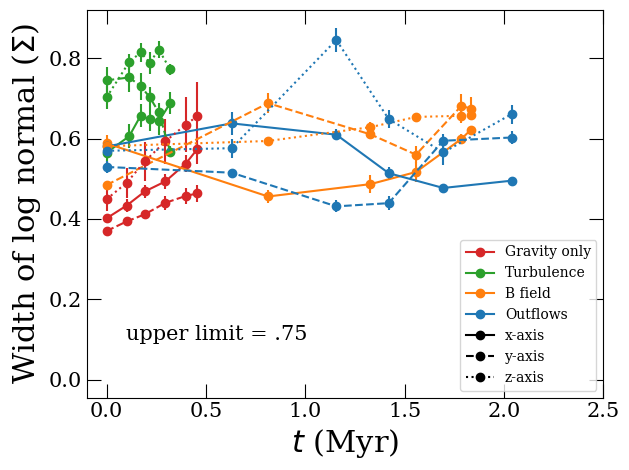

In [18]:
#main plotting cell
line = ('solid', 'dashed', 'dotted')
plt.annotate('upper limit = .75',[.1,.1], size =15)
#inputfile = ('txt_file_storage/sigma_0%.txt','txt_file_storage/sigma_1%.txt','txt_file_storage/sigma_2%.txt','txt_file_storage/sigma_3%.txt','txt_file_storage/sigma_4%.txt','txt_file_storage/sigma_5%.txt')
inputfile = ('txt_file_storage/sigma_0%_lim75.txt','txt_file_storage/sigma_1%_lim75.txt','txt_file_storage/sigma_2%_lim75.txt','txt_file_storage/sigma_3%_lim75.txt','txt_file_storage/sigma_4%_lim75.txt','txt_file_storage/sigma_5%_lim75.txt')
plt.tick_params(direction='in', length=6)

for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    error_x_g = []
    error_x_gt = []
    error_x_gtm = []
    error_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])
        #error bar cutting
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[1]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        error_x_g.append(slope_list[0+a])
        error_x_gt.append(slope_list[3+a])
        error_x_gtm.append(slope_list[6+a])
        error_x_gtmp.append(slope_list[9+a])
        
    plt.errorbar(time_g,slope_x_g,yerr = error_x_g, marker = "o", color = 'C3', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gt,slope_x_gt,yerr = error_x_gt, marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gtm,slope_x_gtm,yerr = error_x_gtm, marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gtmp,slope_x_gtmp,yerr = error_x_gtmp, marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    #Invisible lines to fix legend
    plt.plot(10,0, marker = "o", color = 'C3', linestyle = line[0])
    plt.plot(10,0, marker = "o", color = 'C2', linestyle = line[0])
    plt.plot(10,0, marker = "o", color = 'C1', linestyle = line[0])
    plt.plot(10,0, marker = "o", color = 'C0', linestyle = line[0])
    plt.plot(10,0, marker = "o", color = 'black', linestyle = line[0])
    plt.plot(10,0, marker = "o", color = 'black', linestyle = line[1])
    plt.plot(10,0, marker = "o", color = 'black', linestyle = line[2])
    #plot bells and whistles
    #plt.title('Log Normal Sigma V.S. Time', size = 15)
    plt.xlabel(r'$t$ (Myr)', size=22)
    plt.ylabel(r'Width of log normal ($\Sigma$)', size=22)
    #plt.ylim( -5.5,-1.8)
    plt.xlim(-.1,2.5)
    plt.tick_params(direction='in', length=10, labelsize = 15, which = 'major', top = True,right = True)
    plt.legend(['Gravity only', 'Turbulence', 'B field', 'Outflows', 'x-axis','y-axis','z-axis'], loc = 'lower right')
    plt.tight_layout()
plt.savefig('cdensity_sigma_plot_lim,75.pdf')


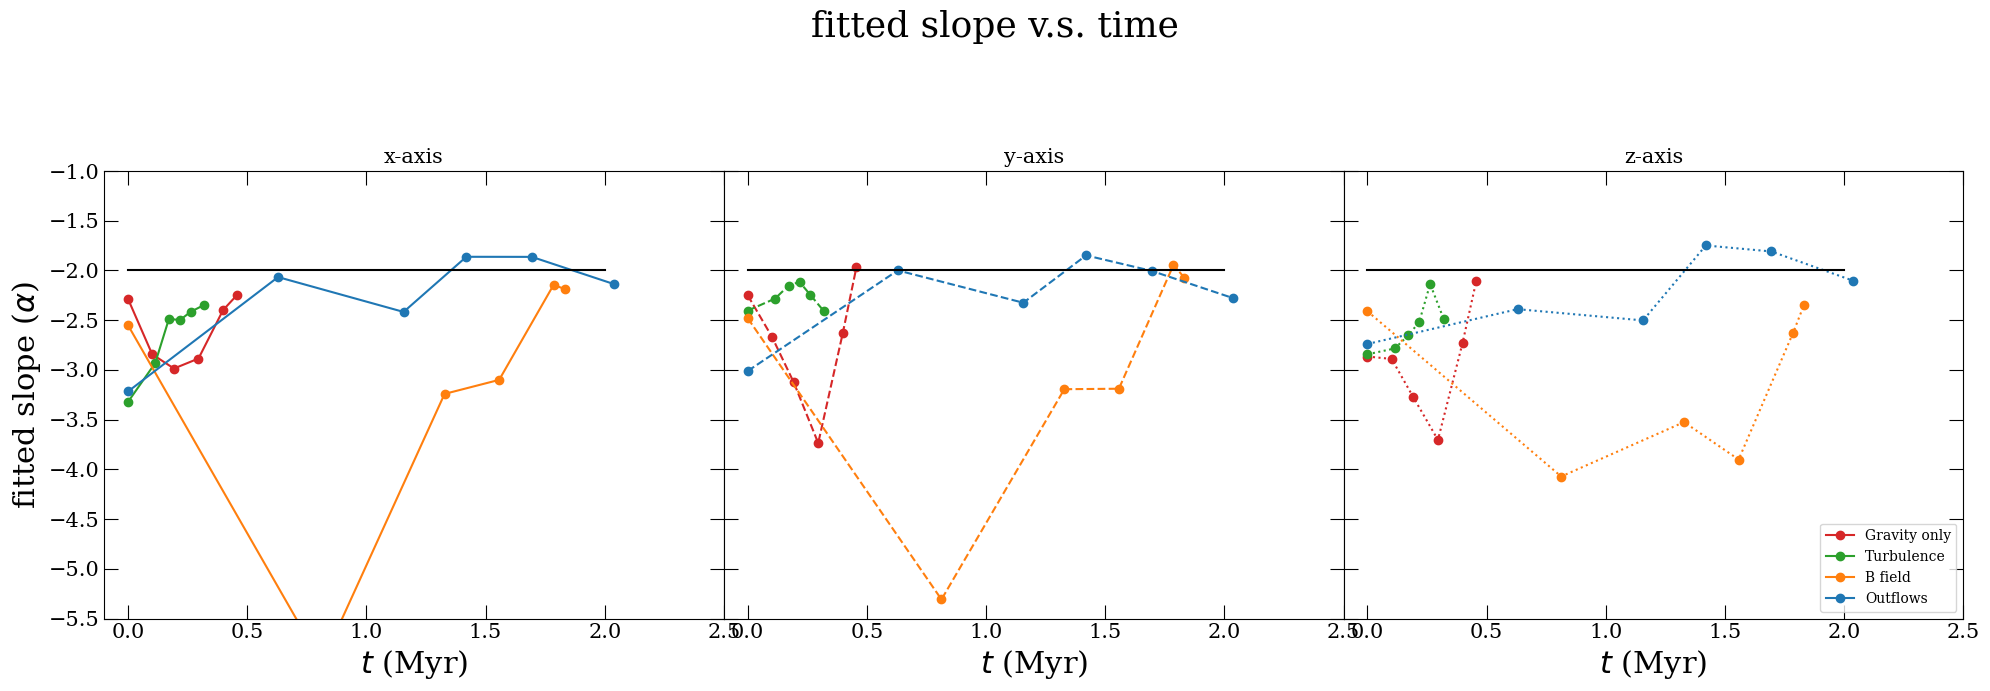

In [8]:
#slope subplot version
#main plotting cell
line = ('solid', 'dashed', 'dotted')
#inputfile = ('slope_0%.txt','slope_1%.txt','slope_2%.txt','slope_3%.txt','slope_4%.txt','slope_5%.txt')#,'slope_10%_and_6%.txt',)
inputfile = ('txt_file_storage/slope_0%_lim1.txt','txt_file_storage/slope_1%_lim1.txt','txt_file_storage/slope_2%_lim1.txt','txt_file_storage/slope_3%_lim1.txt','txt_file_storage/slope_4%_lim1.txt','txt_file_storage/slope_5%_lim1.txt')

fig, ax = plt.subplots(nrows=1,ncols=3, sharex=True, sharey=True,figsize=(20,7), gridspec_kw={'wspace':0.0,'hspace':0.0})
ax =ax.ravel()
ax[0].tick_params(direction='in', length=6)

plt.suptitle('fitted slope v.s. time', size =26)
ax[0].annotate('lower limit = 1',[.1,.1], size =15)
titles = ['x-axis', 'y-axis','z-axis']
for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    error_x_g = []
    error_x_gt = []
    error_x_gtm = []
    error_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])

        
    ax[a].plot(time_g,slope_x_g, marker = "o", color = 'C3', linestyle = line[a])#, alpha =alpha[a])
    ax[a].plot(time_gt,slope_x_gt, marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    ax[a].plot(time_gtm,slope_x_gtm, marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    ax[a].plot(time_gtmp,slope_x_gtmp, marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    #Invisible lines to fix legend
    plt.plot(0,0, marker = "o", color = 'C3', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'C2', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'C1', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'C0', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'black', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'black', linestyle = line[1])
    plt.plot(0,0, marker = "o", color = 'black', linestyle = line[2])

    #plot bells and whistles
    ax[a].set_title(titles[a], size = 15)
    ax[a].set_xlabel(r'$t$ (Myr)', size=22)
    ax[0].set_ylabel(r'fitted slope ($\alpha$)', size=22)
    ax[a].set_ylim(-5.5,-1)
    ax[a].set_xlim(-.1,2.5)
    ax[a].tick_params(direction='in', length=10, labelsize = 15, which = 'major', top = True,right = True)
    #ax[a].plot((0,1,2),(-2,-2,-2), color = 'black')
    plt.legend(['Gravity only', 'Turbulence', 'B field', 'Outflows'], loc = 'lower right')
plt.tight_layout()
plt.subplots_adjust(top=.75)
plt.savefig('cdensity_slope_plot_lim1')


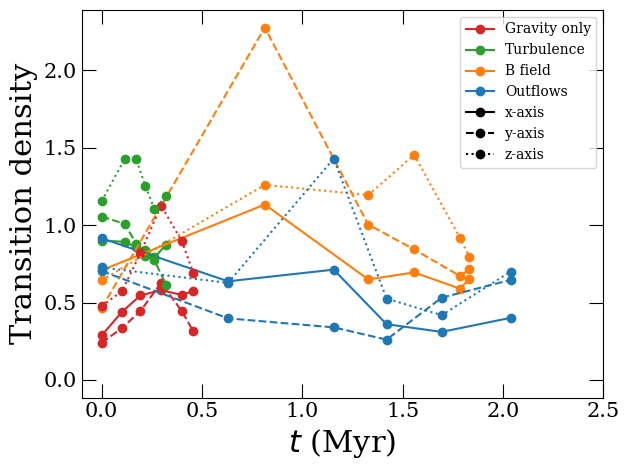

In [17]:
#main plotting cell transition density
line = ('solid', 'dashed', 'dotted')
plt.tick_params(direction='in', length=6)

#plt.annotate('upper limit = .75',[.1,-.1], size =15)
inputfile = ('txt_file_storage/slope_0%_lim1.txt','txt_file_storage/slope_1%_lim1.txt','txt_file_storage/slope_2%_lim1.txt','txt_file_storage/slope_3%_lim1.txt','txt_file_storage/slope_4%_lim1.txt','txt_file_storage/slope_5%_lim1.txt')#,'slope_10%_and_6%.txt',)
inputsigma = ('txt_file_storage/sigma_0%_lim75.txt','txt_file_storage/sigma_1%_lim75.txt','txt_file_storage/sigma_2%_lim75.txt','txt_file_storage/sigma_3%_lim75.txt','txt_file_storage/sigma_4%_lim75.txt','txt_file_storage/sigma_5%_lim75.txt')
plt.plot(10,0, marker = "o", color = 'C3', linestyle = line[0])
plt.plot(10,0, marker = "o", color = 'C2', linestyle = line[0])
plt.plot(10,0, marker = "o", color = 'C1', linestyle = line[0])
plt.plot(10,0, marker = "o", color = 'C0', linestyle = line[0])
plt.plot(10,0, marker = "o", color = 'black', linestyle = line[0])
plt.plot(10,0, marker = "o", color = 'black', linestyle = line[1])
plt.plot(10,0, marker = "o", color = 'black', linestyle = line[2])
for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
#    error_x_g = []
#    error_x_gt = []
#    error_x_gtm = []
#    error_x_gtmp = []
    sigma_x_g = []
    sigma_x_gt = []
    sigma_x_gtm = []
    sigma_x_gtmp = []
#    error_x_g = []
#    error_x_gt = []
#    error_x_gtm = []
#    error_x_gtmp = []
    gravity = []
    turbulence = []
    magnetic = []
    outflows = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputsigma[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        sigma_x_g.append(slope_list[0+a])
        sigma_x_gt.append(slope_list[3+a])
        sigma_x_gtm.append(slope_list[6+a])
        sigma_x_gtmp.append(slope_list[9+a])
       
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])
        gravity.append((-slope_x_g[ii]-.5)*sigma_x_g[ii]**2)
        turbulence.append((-slope_x_gt[ii]-.5)*sigma_x_gt[ii]**2)
        magnetic.append((-slope_x_gtm[ii]-.5)*sigma_x_gtm[ii]**2)
        outflows.append((-slope_x_gtmp[ii]-.5)*sigma_x_gtmp[ii]**2)

    plt.plot(time_g,gravity,marker = "o", color = 'C3', linestyle = line[a])#, alpha =alpha[a])
    plt.plot(time_gt,turbulence, marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    plt.plot(time_gtm,magnetic, marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    plt.plot(time_gtmp,outflows, marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    #Invisible lines to fix legend
plt.legend(['Gravity only', 'Turbulence', 'B field', 'Outflows', 'x-axis','y-axis','z-axis'], loc = 'upper right')
#plot bells and whistles
#plt.title('Transition Density V.S. Time', size = 15)
plt.xlabel(r'$t$ (Myr)', size=22)
plt.ylabel(r'Transition density', size=22)
plt.tick_params(direction='in', length=10, labelsize = 15, which = 'major', top = True,right = True)

#plt.ylim( -5.5,-1.8)
plt.xlim(-.1,2.5)
plt.tight_layout()
plt.savefig('trans_density_lim,75_lim1.pdf')


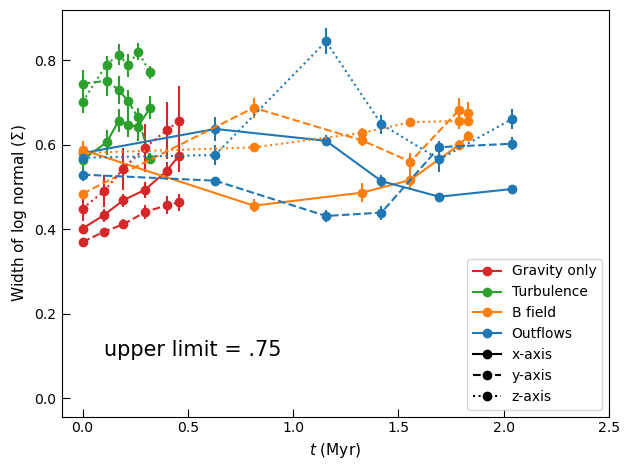

In [20]:
#wdith of log normal
line = ('solid', 'dashed', 'dotted')
plt.annotate('upper limit = .75',[.1,.1], size =15)
plt.tick_params(direction='in', length=6)
#inputfile = ('txt_file_storage/sigma_0%.txt','txt_file_storage/sigma_1%.txt','txt_file_storage/sigma_2%.txt','txt_file_storage/sigma_3%.txt','txt_file_storage/sigma_4%.txt','txt_file_storage/sigma_5%.txt')
inputfile = ('txt_file_storage/sigma_0%_lim75.txt','txt_file_storage/sigma_1%_lim75.txt','txt_file_storage/sigma_2%_lim75.txt','txt_file_storage/sigma_3%_lim75.txt','txt_file_storage/sigma_4%_lim75.txt','txt_file_storage/sigma_5%_lim75.txt')

for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    error_x_g = []
    error_x_gt = []
    error_x_gtm = []
    error_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])
        #error bar cutting
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[1]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        error_x_g.append(slope_list[0+a])
        error_x_gt.append(slope_list[3+a])
        error_x_gtm.append(slope_list[6+a])
        error_x_gtmp.append(slope_list[9+a])
        
    plt.errorbar(time_g,slope_x_g,yerr = error_x_g, marker = "o", color = 'C3', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gt,slope_x_gt,yerr = error_x_gt, marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gtm,slope_x_gtm,yerr = error_x_gtm, marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gtmp,slope_x_gtmp,yerr = error_x_gtmp, marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    #Invisible lines to fix legend
    plt.plot(10,0, marker = "o", color = 'C3', linestyle = line[0])
    plt.plot(10,0, marker = "o", color = 'C2', linestyle = line[0])
    plt.plot(10,0, marker = "o", color = 'C1', linestyle = line[0])
    plt.plot(10,0, marker = "o", color = 'C0', linestyle = line[0])
    plt.plot(10,0, marker = "o", color = 'black', linestyle = line[0])
    plt.plot(10,0, marker = "o", color = 'black', linestyle = line[1])
    plt.plot(10,0, marker = "o", color = 'black', linestyle = line[2])
    #plot bells and whistles
    #plt.title('Log Normal Sigma V.S. Time', size = 15)
    plt.xlabel(r'$t$ (Myr)', size=11)
    plt.ylabel(r'Width of log normal ($\Sigma$)', size=11)
    #plt.ylim( -5.5,-1.8)
    plt.xlim(-.1,2.5)
    plt.legend(['Gravity only', 'Turbulence', 'B field', 'Outflows', 'x-axis','y-axis','z-axis'], loc = 'lower right')
    plt.tight_layout()
plt.savefig('_sigma_plot_lim,75')


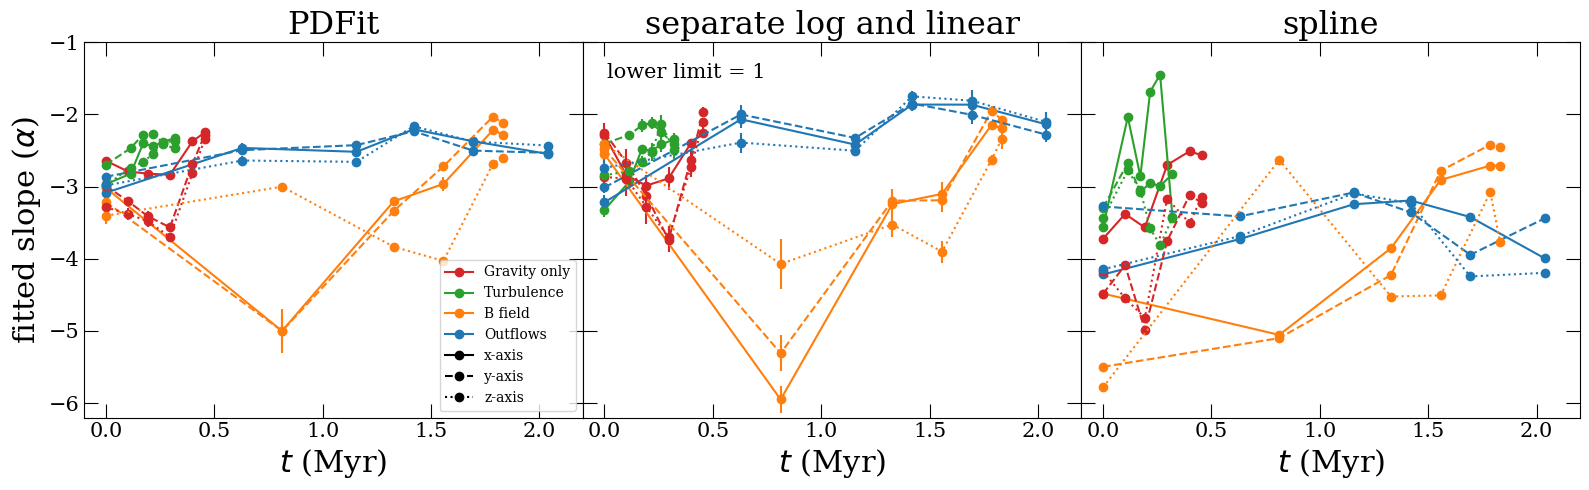

In [16]:
###compare slopes of 3 different methods
#importing timing and other files
fig, ax = plt.subplots(nrows=1,ncols=3, sharex=True, sharey=True,figsize=(16,5), gridspec_kw ={'wspace':0.0,'hspace':0.0})
ax =ax.ravel()
ax[0].tick_params(direction='in', length=6)
               
def convert(slope):
    return [-i for i in slope]
inputfile = ('slope_0%.txt','slope_1%.txt','slope_2%.txt','slope_3%.txt','slope_4%.txt','slope_5%.txt')#,'slope_10%_and_6%.txt',)
time_file = pd.read_csv("Time_conversions.csv")
times = time_file['time']
times = times*3.71e-14   #convert seconds to Myear
time_gtmp =times[0:6]
time_gtmp = time_gtmp-time_gtmp[0]
time_gtm = times[7:13]
time_gtm = time_gtm-time_gtm[7]
time_gt = times[14:20]
time_gt = time_gt-time_gt[14]
time_g = times[21:27]
time_g = time_g-time_g[21]

#main plotting cell
line = ('solid', 'dashed', 'dotted')
#inputfile = ('txt_file_storage/slope_0%_lim,5.txt','txt_file_storage/slope_1%_lim,5.txt','txt_file_storage/slope_2%_lim,5.txt','txt_file_storage/slope_3%_lim,5.txt','txt_file_storage/slope_4%_lim,5.txt','txt_file_storage/slope_5%_lim,5.txt')#,'slope_10%_and_6%.txt',)
inputfile = ('txt_file_storage/power_fit_slope0%.txt','txt_file_storage/power_fit_slope1%.txt','txt_file_storage/power_fit_slope2%.txt','txt_file_storage/power_fit_slope3%.txt','txt_file_storage/power_fit_slope4%.txt','txt_file_storage/power_fit_slope5%.txt')

for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    error_x_g = []
    error_x_gt = []
    error_x_gtm = []
    error_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])
        #error bar cutting
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[1]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        error_x_g.append(slope_list[0+a])
        error_x_gt.append(slope_list[3+a])
        error_x_gtm.append(slope_list[6+a])
        error_x_gtmp.append(slope_list[9+a])
        
    ax[0].errorbar(time_g,convert(slope_x_g),yerr = error_x_g, marker = "o", color = 'C3', linestyle = line[a])#, alpha =alpha[a])
    ax[0].errorbar(time_gt,convert(slope_x_gt),yerr = error_x_gt, marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    ax[0].errorbar(time_gtm,convert(slope_x_gtm),yerr = error_x_gtm, marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    ax[0].errorbar(time_gtmp,convert(slope_x_gtmp),yerr = error_x_gtmp, marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    #Invisible lines to fix legend
    ax[0].plot(0,0, marker = "o", color = 'C3', linestyle = line[0])
    ax[0].plot(0,0, marker = "o", color = 'C2', linestyle = line[0])
    ax[0].plot(0,0, marker = "o", color = 'C1', linestyle = line[0])
    ax[0].plot(0,0, marker = "o", color = 'C0', linestyle = line[0])
    ax[0].plot(0,0, marker = "o", color = 'black', linestyle = line[0])
    ax[0].plot(0,0, marker = "o", color = 'black', linestyle = line[1])
    ax[0].plot(0,0, marker = "o", color = 'black', linestyle = line[2])
    #plot bells and whistles
    #plt.title('Fitted Slope V.S. time', size = 15)
    ax[0].set_xlabel(r'$t$ (Myr)', size=22)
    ax[0].set_ylabel(r'fitted slope ($\alpha$)', size=22)
    ax[0].set_title('piecewise function')
    ax[0].set_ylim(-6.2,-1)
    ax[0].set_xlim(-.1,2.2)
    ax[0].set_title('PDFit', size =23)
    ax[0].legend(['Gravity only', 'Turbulence', 'B field', 'Outflows', 'x-axis','y-axis','z-axis'], loc = 'lower right')
#plt.plot((0,1,2),(-2,-2,-2), color='black')

inputfile = ('txt_file_storage/slope_0%_lim1.txt','txt_file_storage/slope_1%_lim1.txt','txt_file_storage/slope_2%_lim1.txt','txt_file_storage/slope_3%_lim1.txt','txt_file_storage/slope_4%_lim1.txt','txt_file_storage/slope_5%_lim1.txt')

ax[1].annotate('lower limit = 1',[.01,-1.5], size =15)

for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    error_x_g = []
    error_x_gt = []
    error_x_gtm = []
    error_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])
        #error bar cutting
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[1]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        error_x_g.append(slope_list[0+a])
        error_x_gt.append(slope_list[3+a])
        error_x_gtm.append(slope_list[6+a])
        error_x_gtmp.append(slope_list[9+a])
        
    ax[1].errorbar(time_g,(slope_x_g),yerr = error_x_g, marker = "o", color = 'C3', linestyle = line[a])#, alpha =alpha[a])
    ax[1].errorbar(time_gt,(slope_x_gt),yerr = error_x_gt, marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    ax[1].errorbar(time_gtm,(slope_x_gtm),yerr = error_x_gtm, marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    ax[1].errorbar(time_gtmp,(slope_x_gtmp),yerr = error_x_gtmp, marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    #Invisible lines to fix legend
    ax[1].plot(0,0, marker = "o", color = 'C3', linestyle = line[0])
    ax[1].plot(0,0, marker = "o", color = 'C2', linestyle = line[0])
    ax[1].plot(0,0, marker = "o", color = 'C1', linestyle = line[0])
    ax[1].plot(0,0, marker = "o", color = 'C0', linestyle = line[0])
    ax[1].plot(0,0, marker = "o", color = 'black', linestyle = line[0])
    ax[1].plot(0,0, marker = "o", color = 'black', linestyle = line[1])
    ax[1].plot(0,0, marker = "o", color = 'black', linestyle = line[2])
    #plot bells and whistles
    #plt.title('Fitted Slope V.S. time', size = 15)
    ax[1].set_xlabel(r'$t$ (Myr)', size=22)
    #ax[1].set_ylabel(r'fitted slope ($\alpha$)', size=11)
    ax[1].set_ylim(-6.2,-1)
    ax[1].set_xlim(-.1,2.2)
    ax[1].set_title('separate log and linear', size = 23)
    #ax[1].legend(['Gravity only', 'Turbulence', 'B field', 'Outflows', 'x-axis','y-axis','z-axis'])
    
    
#### Spline
inputfile = ('txt_file_storage/spline_slope0%.txt','txt_file_storage/spline_slope1%.txt','txt_file_storage/spline_slope2%.txt','txt_file_storage/spline_slope3%.txt','txt_file_storage/spline_slope4%.txt','txt_file_storage/spline_slope5%.txt')

for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    error_x_g = []
    error_x_gt = []
    error_x_gtm = []
    error_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])
        #error bar cutting
        '''
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[1]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        error_x_g.append(slope_list[0+a])
        error_x_gt.append(slope_list[3+a])
        error_x_gtm.append(slope_list[6+a])
        error_x_gtmp.append(slope_list[9+a])
        '''
    ax[2].plot(time_g,(slope_x_g), marker = "o", color = 'C3', linestyle = line[a])#, alpha =alpha[a])
    ax[2].plot(time_gt,(slope_x_gt), marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    ax[2].plot(time_gtm,(slope_x_gtm), marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    ax[2].plot(time_gtmp,(slope_x_gtmp), marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    #Invisible lines to fix legend
    ax[2].plot(0,0, marker = "o", color = 'C3', linestyle = line[0])
    ax[2].plot(0,0, marker = "o", color = 'C2', linestyle = line[0])
    ax[2].plot(0,0, marker = "o", color = 'C1', linestyle = line[0])
    ax[2].plot(0,0, marker = "o", color = 'C0', linestyle = line[0])
    ax[2].plot(0,0, marker = "o", color = 'black', linestyle = line[0])
    ax[2].plot(0,0, marker = "o", color = 'black', linestyle = line[1])
    ax[2].plot(0,0, marker = "o", color = 'black', linestyle = line[2])
    #plot bells and whistles
    #plt.title('Fitted Slope V.S. time', size = 15)
    ax[2].set_xlabel(r'$t$ (Myr)', size=22)
    #ax[2].set_ylabel(r'fitted slope ($\alpha$)', size=11)
    ax[2].set_title('spline', size = 23)
    ax[2].set_ylim(-6.2,-1)
    ax[2].set_xlim(-.1,2.2)
    ax[a].tick_params(direction='in', length=10, labelsize = 15, which = 'major', top = True,right = True)

    #ax[2].legend(['Gravity only', 'Turbulence', 'B field', 'Outflows', 'x-axis','y-axis','z-axis'])
    
plt.tight_layout()
plt.savefig('slope_comparison.pdf')


/home/jak491/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:87: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
/home/jak491/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:141: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


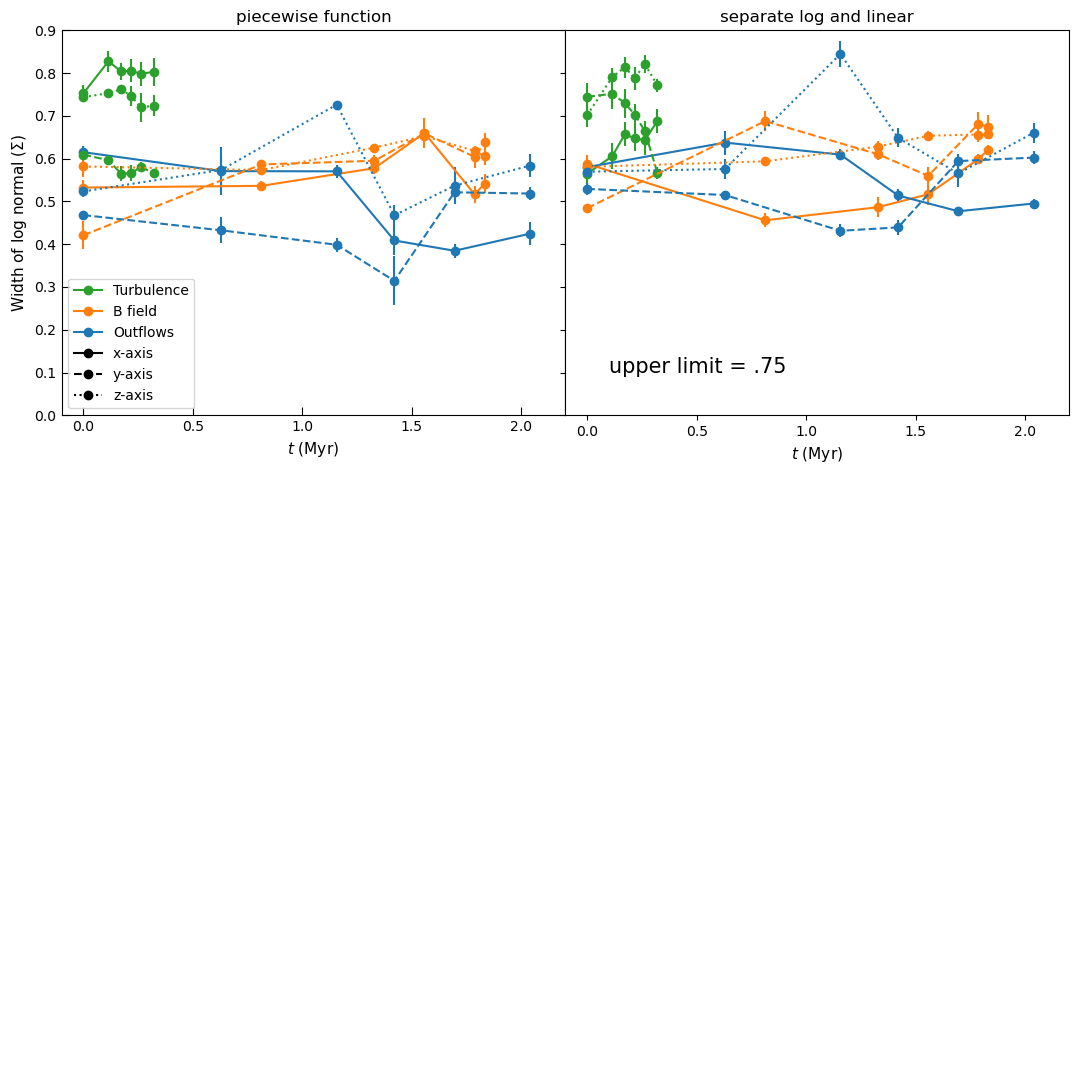

In [5]:
#width of log normal combined
fig, ax = plt.subplots(nrows=1,ncols=2, sharex=True, sharey=True,figsize=(13,5), gridspec_kw ={'wspace':0.0,'hspace':0.0})
ax =ax.ravel()
ax[0].tick_params(direction='in', length=6)

#importing timing and other files
def convert(slope):
    return [-i for i in slope_x_g]
inputfile = ('slope_0%.txt','slope_1%.txt','slope_2%.txt','slope_3%.txt','slope_4%.txt','slope_5%.txt')#,'slope_10%_and_6%.txt',)
time_file = pd.read_csv("Time_conversions.csv")
times = time_file['time']
times = times*3.71e-14   #convert seconds to Myear
time_gtmp =times[0:6]
time_gtmp = time_gtmp-time_gtmp[0]
time_gtm = times[7:13]
time_gtm = time_gtm-time_gtm[7]
time_gt = times[14:20]
time_gt = time_gt-time_gt[14]
time_g = times[21:27]
time_g = time_g-time_g[21]

#main plotting cell
line = ('solid', 'dashed', 'dotted')
#inputfile = ('txt_file_storage/slope_0%_lim,5.txt','txt_file_storage/slope_1%_lim,5.txt','txt_file_storage/slope_2%_lim,5.txt','txt_file_storage/slope_3%_lim,5.txt','txt_file_storage/slope_4%_lim,5.txt','txt_file_storage/slope_5%_lim,5.txt')#,'slope_10%_and_6%.txt',)
inputfile = ('txt_file_storage/power_fit_sigma0%.txt','txt_file_storage/power_fit_sigma1%.txt','txt_file_storage/power_fit_sigma2%.txt','txt_file_storage/power_fit_sigma3%.txt','txt_file_storage/power_fit_sigma4%.txt','txt_file_storage/power_fit_sigma5%.txt')

plt.annotate('lower limit = 1',[.01,-1.5], size =15)

for a in range(3):
    sigma_x_g = []
    sigma_x_gt = []
    sigma_x_gtm = []
    sigma_x_gtmp = []
    error_x_g = []
    error_x_gt = []
    error_x_gtm = []
    error_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        sigma_list = string3.astype('float')
        sigma_x_g.append(sigma_list[0+a])
        sigma_x_gt.append(sigma_list[3+a])
        sigma_x_gtm.append(sigma_list[6+a])
        sigma_x_gtmp.append(sigma_list[9+a])
        #error bar cutting
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[1]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        err_list = string3.astype('float')
        error_x_g.append(err_list[0+a])
        error_x_gt.append(err_list[3+a])
        error_x_gtm.append(err_list[6+a])
        error_x_gtmp.append(err_list[9+a])
        
    #ax[0].errorbar(time_g,sigma_x_g,yerr = error_x_g, marker = "o", color = 'C3', linestyle = line[a])#, alpha =alpha[a])
    ax[0].errorbar(time_gt,sigma_x_gt,yerr = error_x_gt, marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    ax[0].errorbar(time_gtm,sigma_x_gtm,yerr = error_x_gtm, marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    ax[0].errorbar(time_gtmp,sigma_x_gtmp,yerr = error_x_gtmp, marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    #Invisible lines to fix legend
    #ax[0].plot(10,0, marker = "o", color = 'C3', linestyle = line[0])
    ax[0].plot(10,0, marker = "o", color = 'C2', linestyle = line[0])
    ax[0].plot(10,0, marker = "o", color = 'C1', linestyle = line[0])
    ax[0].plot(10,0, marker = "o", color = 'C0', linestyle = line[0])
    ax[0].plot(10,0, marker = "o", color = 'black', linestyle = line[0])
    ax[0].plot(10,0, marker = "o", color = 'black', linestyle = line[1])
    ax[0].plot(10,0, marker = "o", color = 'black', linestyle = line[2])
    #plot bells and whistles
    #plt.title('Fitted Slope V.S. time', size = 15)
    ax[0].set_xlabel(r'$t$ (Myr)', size=11)
    ax[0].set_ylabel(r'Width of log normal ($\Sigma$)', size=11)
    ax[0].set_ylim(0,.9)
    ax[0].set_xlim(-.1,2.2)
    ax[0].set_title('piecewise function')
    ax[0].legend(['Turbulence', 'B field', 'Outflows', 'x-axis','y-axis','z-axis'])
    plt.tight_layout()
    
#main plotting cell
line = ('solid', 'dashed', 'dotted')
ax[1].annotate('upper limit = .75',[.1,.1], size =15)
#inputfile = ('txt_file_storage/sigma_0%.txt','txt_file_storage/sigma_1%.txt','txt_file_storage/sigma_2%.txt','txt_file_storage/sigma_3%.txt','txt_file_storage/sigma_4%.txt','txt_file_storage/sigma_5%.txt')
inputfile = ('txt_file_storage/sigma_0%_lim75.txt','txt_file_storage/sigma_1%_lim75.txt','txt_file_storage/sigma_2%_lim75.txt','txt_file_storage/sigma_3%_lim75.txt','txt_file_storage/sigma_4%_lim75.txt','txt_file_storage/sigma_5%_lim75.txt')

for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    error_x_g = []
    error_x_gt = []
    error_x_gtm = []
    error_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])
        #error bar cutting
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[1]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        error_x_g.append(slope_list[0+a])
        error_x_gt.append(slope_list[3+a])
        error_x_gtm.append(slope_list[6+a])
        error_x_gtmp.append(slope_list[9+a])
        
    #ax[1].errorbar(time_g,slope_x_g,yerr = error_x_g, marker = "o", color = 'C3', linestyle = line[a])#, alpha =alpha[a])
    ax[1].errorbar(time_gt,slope_x_gt,yerr = error_x_gt, marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    ax[1].errorbar(time_gtm,slope_x_gtm,yerr = error_x_gtm, marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    ax[1].errorbar(time_gtmp,slope_x_gtmp,yerr = error_x_gtmp, marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    #plot bells and whistles
    #plt.title('Log Normal Sigma V.S. Time', size = 15)
    ax[1].set_title('separate log and linear')
    ax[1].set_xlabel(r'$t$ (Myr)', size=11)
    plt.tight_layout()

#plt.plot((0,1,2),(-2,-2,-2), color='black')
plt.savefig('sigma_compare_plot_lim1')



<function matplotlib.pyplot.show(*args, **kw)>

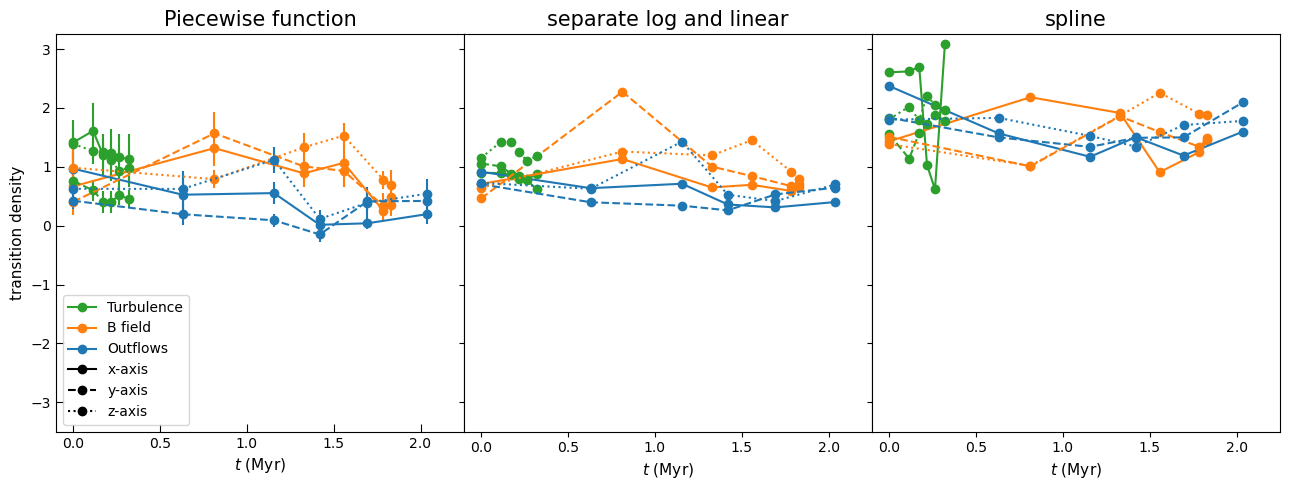

In [7]:
#main plotting cell
line = ('solid', 'dashed', 'dotted')
#inputfile = ('txt_file_storage/slope_0%_lim,5.txt','txt_file_storage/slope_1%_lim,5.txt','txt_file_storage/slope_2%_lim,5.txt','txt_file_storage/slope_3%_lim,5.txt','txt_file_storage/slope_4%_lim,5.txt','txt_file_storage/slope_5%_lim,5.txt')#,'slope_10%_and_6%.txt',)
inputfile = ('txt_file_storage/trans_density0%.txt','txt_file_storage/trans_density1%.txt','txt_file_storage/trans_density2%.txt','txt_file_storage/trans_density3%.txt','txt_file_storage/trans_density4%.txt','txt_file_storage/trans_density5%.txt')

fig, ax = plt.subplots(nrows=1,ncols=3, sharex=True, sharey=True,figsize=(13,5), gridspec_kw ={'wspace':0.0,'hspace':0.0})
ax =ax.ravel()
ax[0].tick_params(direction='in', length=6)

for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    error_x_g = []
    error_x_gt = []
    error_x_gtm = []
    error_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])
        #error bar cutting
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[1]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        error_x_g.append(slope_list[0+a])
        error_x_gt.append(slope_list[3+a])
        error_x_gtm.append(slope_list[6+a])
        error_x_gtmp.append(slope_list[9+a])
        
    #ax[0].errorbar(time_g,slope_x_g,yerr = error_x_g, marker = "o", color = 'C3', linestyle = line[a])#, alpha =alpha[a])
    ax[0].errorbar(time_gt,slope_x_gt,yerr = error_x_gt, marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    ax[0].errorbar(time_gtm,slope_x_gtm,yerr = error_x_gtm, marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    ax[0].errorbar(time_gtmp,slope_x_gtmp,yerr = error_x_gtmp, marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    #Invisible lines to fix legend
    ax[0].plot(10,0, marker = "o", color = 'C2', linestyle = line[0])
    ax[0].plot(10,0, marker = "o", color = 'C1', linestyle = line[0])
    ax[0].plot(10,0, marker = "o", color = 'C0', linestyle = line[0])
    ax[0].plot(10,0, marker = "o", color = 'black', linestyle = line[0])
    ax[0].plot(10,0, marker = "o", color = 'black', linestyle = line[1])
    ax[0].plot(10,0, marker = "o", color = 'black', linestyle = line[2])
    #plot bells and whistles
    ax[0].set_title('Piecewise function', size = 15)
    ax[0].set_xlabel(r'$t$ (Myr)', size=11)
    ax[0].set_ylabel(r'transition density', size=11)
    ax[0].set_ylim(-3.5,3.25)
    ax[0].set_xlim(-.1,2.25)
    ax[0].legend([ 'Turbulence', 'B field', 'Outflows', 'x-axis','y-axis','z-axis'])
#plt.plot((0,1,2),(-2,-2,-2), color='black')

#main plotting cell transition density
line = ('solid', 'dashed', 'dotted')
#plt.annotate('upper limit = .75',[.1,-.1], size =15)
inputfile = ('txt_file_storage/slope_0%_lim1.txt','txt_file_storage/slope_1%_lim1.txt','txt_file_storage/slope_2%_lim1.txt','txt_file_storage/slope_3%_lim1.txt','txt_file_storage/slope_4%_lim1.txt','txt_file_storage/slope_5%_lim1.txt')#,'slope_10%_and_6%.txt',)
inputsigma = ('txt_file_storage/sigma_0%_lim75.txt','txt_file_storage/sigma_1%_lim75.txt','txt_file_storage/sigma_2%_lim75.txt','txt_file_storage/sigma_3%_lim75.txt','txt_file_storage/sigma_4%_lim75.txt','txt_file_storage/sigma_5%_lim75.txt')
for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
#    error_x_g = []
#    error_x_gt = []
#    error_x_gtm = []
#    error_x_gtmp = []
    sigma_x_g = []
    sigma_x_gt = []
    sigma_x_gtm = []
    sigma_x_gtmp = []
#    error_x_g = []
#    error_x_gt = []
#    error_x_gtm = []
#    error_x_gtmp = []
    gravity = []
    turbulence = []
    magnetic = []
    outflows = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputsigma[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        sigma_x_g.append(slope_list[0+a])
        sigma_x_gt.append(slope_list[3+a])
        sigma_x_gtm.append(slope_list[6+a])
        sigma_x_gtmp.append(slope_list[9+a])
       
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])
        gravity.append((-slope_x_g[ii]-.5)*sigma_x_g[ii]**2)
        turbulence.append((-slope_x_gt[ii]-.5)*sigma_x_gt[ii]**2)
        magnetic.append((-slope_x_gtm[ii]-.5)*sigma_x_gtm[ii]**2)
        outflows.append((-slope_x_gtmp[ii]-.5)*sigma_x_gtmp[ii]**2)
    
    #ax[1].plot(time_g,gravity,marker = "o", color = 'C3', linestyle = line[a])#, alpha =alpha[a])
    ax[1].plot(time_gt,turbulence, marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    ax[1].plot(time_gtm,magnetic, marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    ax[1].plot(time_gtmp,outflows, marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    #Invisible lines to fix legend
#plot bells and whistles
ax[1].set_title('separate log and linear', size = 15)
ax[1].set_xlabel(r'$t$ (Myr)', size=11)
#transition of spline
inputfile = ('txt_file_storage/trans_point0%.txt','txt_file_storage/trans_point1%.txt','txt_file_storage/trans_point2%.txt','txt_file_storage/trans_point3%.txt','txt_file_storage/trans_point4%.txt','txt_file_storage/trans_point5%.txt')

for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])
    ax[2].plot(time_gt,slope_x_gt, marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    ax[2].plot(time_gtm,slope_x_gtm, marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    ax[2].plot(time_gtmp,slope_x_gtmp, marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    ax[2].set_title('spline', size = 15)
    ax[2].set_xlabel(r'$t$ (Myr)', size=11)

plt.tight_layout()

plt.savefig('trans_density_combined')
plt.show

In [8]:
slope_list

array([1.30477164, 1.20416894, 1.54338805, 2.61971214, 1.13992225,
       2.02309645, 2.1815733 ])

In [9]:
ii

1